### Kelas Inkubasi
# Business Data Analytics
SMK Telkom x WPC x BeData Technology

### Business Understanding : merumuskan pertanyaan bisnis

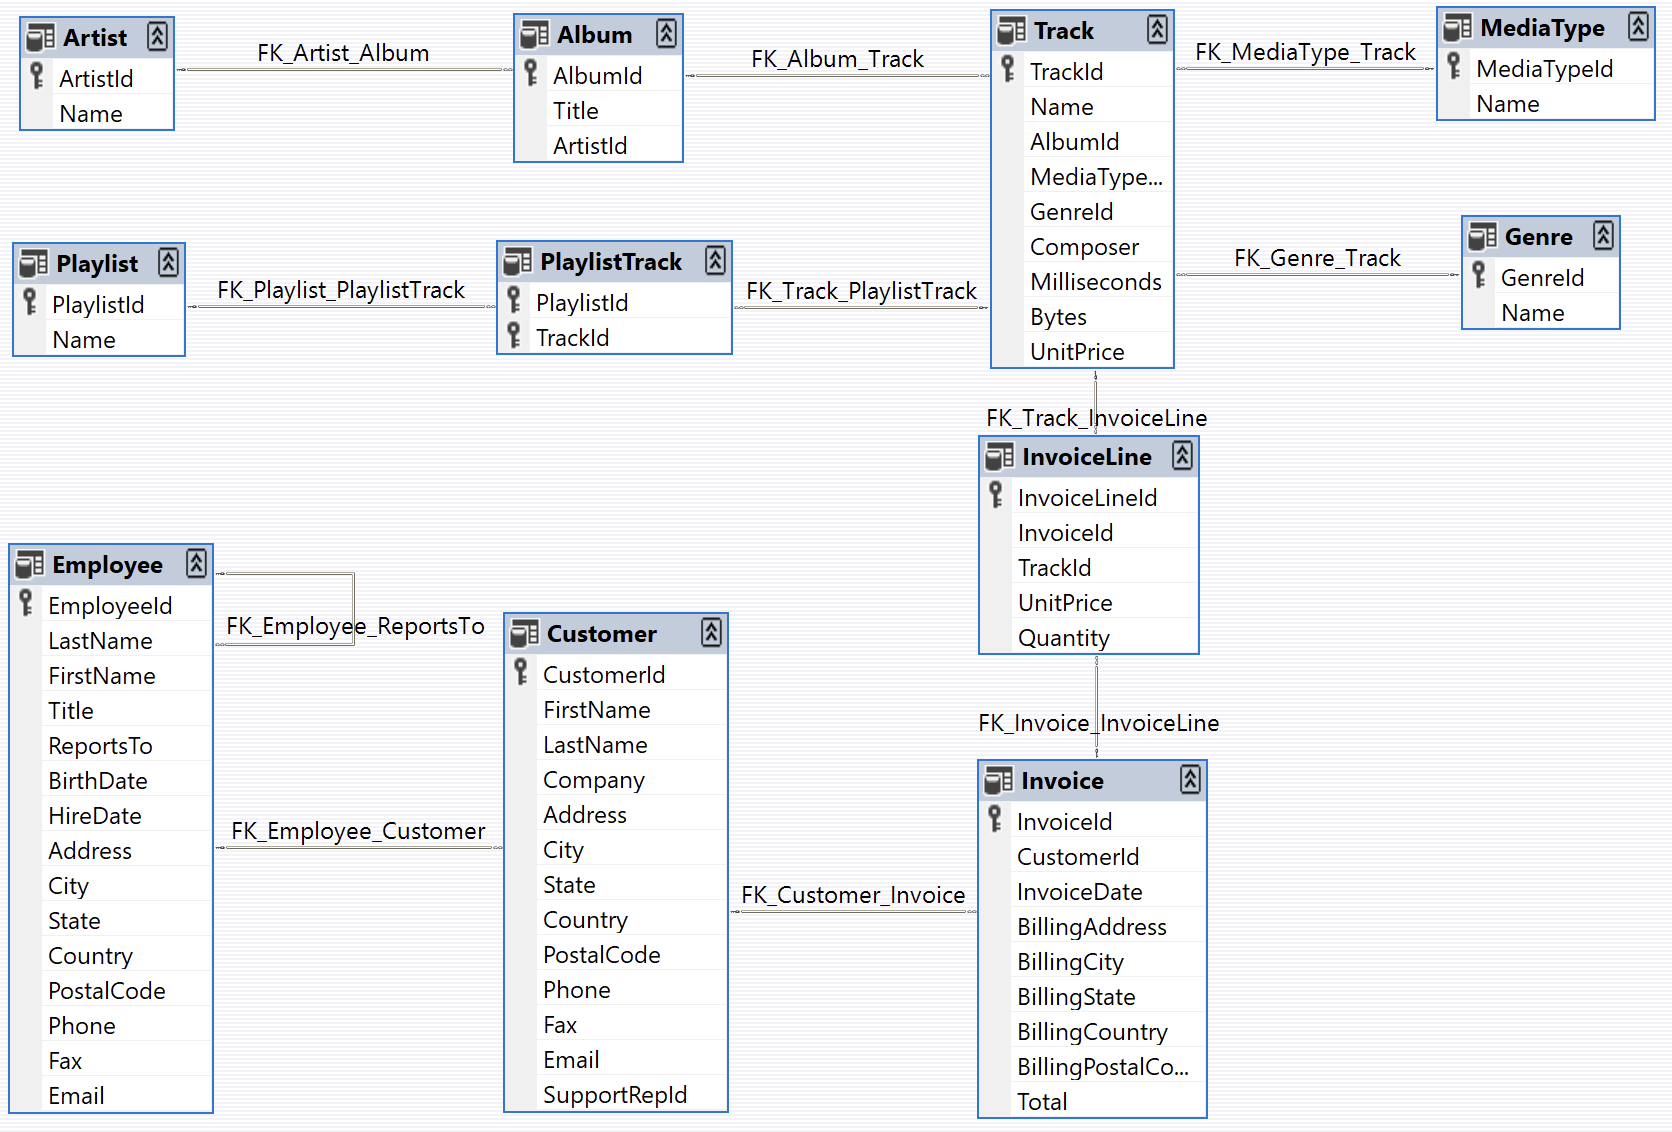

##### Problem : 
Bayangkan Anda adalah seorang analis data untuk "Chinook," sebuah toko musik digital. Model bisnis Chinook adalah menjual trek musik digital kepada pelanggan di seluruh dunia. Manajemen senior datang kepada Anda dengan tujuan yang sangat umum: ***"Kami ingin meningkatkan pendapatan dan memahami pelanggan kami dengan lebih baik."***
Tujuan ini, meskipun penting, terlalu luas untuk dianalisis secara langsung. Tugas Anda adalah memecah tujuan ini menjadi serangkaian pertanyaan bisnis yang spesifik, terukur, dan dapat dijawab menggunakan data yang tersedia dalam basis data perusahaan. Skema basis data adalah peta Anda untuk memahami aset data yang dimiliki.

##### Questions: 
1. Siapa 10 pelanggan dengan total pembelian tertinggi yang secara konsisten menyumbang minimal 20% dari total revenue perusahaan, dan berasal dari 3 negara dengan kontribusi penjualan terbesar, selama periode Januari 2023 hingga Desember 2024?
2. Dalam upaya mencapai target peningkatan pendapatan, dapatkah kita menganalisis total pendapatan yang dihasilkan oleh lima genre musik teratas dan lima artis terlaris secara triwulanan selama dua tahun fiskal terakhir, dan apakah data ini dapat mengungkap adanya tren musiman atau pergeseran preferensi pelanggan yang dapat kita manfaatkan untuk memfokuskan promosi yang ditargetkan?
3. Kota/negara mana yang paling banyak ditangani tiap Support Rep?

## Data Wrangling

### Gathering

In [72]:
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
load_dotenv()
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
HOST = os.getenv("HOST")
USER = os.getenv("USER")
PASSWORD = os.getenv("PASSWORD")
PORT = os.getenv("PORT")
DB_NAME = os.getenv("DB_NAME")
# SSL_MODE = os.getenv("SSL_MODE")

In [3]:
SERVICE_URI = f"postgres://{USER}:{PASSWORD}@{HOST}:{PORT}/{DB_NAME}"
uri = SERVICE_URI.replace("postgres://", "postgresql+psycopg2://", 1)
engine = create_engine(uri)

#### customer

In [4]:
df_customer = pd.read_sql(
    '''SELECT * 
    FROM customer'''
, con=engine)
df_customer.head()

,customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


#### invoice

In [5]:
df_invoice = pd.read_sql(
    '''SELECT * 
    FROM invoice'''
, con=engine)
df_invoice.head()

,invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total
0,1,2,2021-01-01,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2021-01-02,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2021-01-03,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2021-01-06,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2021-01-11,69 Salem Street,Boston,MA,USA,2113,13.86


#### invoice line

In [6]:
df_invoice_line = pd.read_sql(
    '''SELECT * 
    FROM invoice_line'''
, con=engine)
df_invoice_line.head()

,invoice_line_id,invoice_id,track_id,unit_price,quantity
0,1,1,2,0.99,1
1,2,1,4,0.99,1
2,3,2,6,0.99,1
3,4,2,8,0.99,1
4,5,2,10,0.99,1


#### track

In [7]:
df_track = pd.read_sql(
    '''SELECT *
    FROM track'''
    , con=engine)
df_track

,track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,"U. Dirkschneider, W. Hoffmann, H. Frank, P. Ba...",342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99


#### genre

In [8]:
df_genre = pd.read_sql(
    '''
    SELECT *
    FROM genre
    ''', con=engine
)
df_genre

,genre_id,name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll
5,6,Blues
6,7,Latin
7,8,Reggae
8,9,Pop
9,10,Soundtrack


#### album

In [9]:
df_album = pd.read_sql(
    '''
    SELECT *
    FROM album
    ''', con=engine
)
df_album

,album_id,title,artist_id
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274


#### artist

In [10]:
df_artist = pd.read_sql(
    '''
    SELECT *
    FROM artist
    ''', con=engine
)
df_artist

,artist_id,name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains
...,...,...
270,271,"Mela Tenenbaum, Pro Musica Prague & Richard Kapp"
271,272,Emerson String Quartet
272,273,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
273,274,Nash Ensemble


### Assessing & Cleaning

#### customer

In [11]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     59 non-null     int64 
 1   first_name      59 non-null     object
 2   last_name       59 non-null     object
 3   company         10 non-null     object
 4   address         59 non-null     object
 5   city            59 non-null     object
 6   state           30 non-null     object
 7   country         59 non-null     object
 8   postal_code     55 non-null     object
 9   phone           58 non-null     object
 10  fax             12 non-null     object
 11  email           59 non-null     object
 12  support_rep_id  59 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.1+ KB


In [12]:
df_customer.duplicated().sum()

np.int64(0)

In [13]:
df_customer = df_customer.drop(df_customer[['company', 'state', 'fax']], axis=1)
df_customer.head()

,customer_id,first_name,last_name,address,city,country,postal_code,phone,email,support_rep_id
0,1,Luís,Gonçalves,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,Brazil,12227-000,+55 (12) 3923-5555,luisg@embraer.com.br,3
1,2,Leonie,Köhler,Theodor-Heuss-Straße 34,Stuttgart,Germany,70174,+49 0711 2842222,leonekohler@surfeu.de,5
2,3,François,Tremblay,1498 rue Bélanger,Montréal,Canada,H2G 1A7,+1 (514) 721-4711,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,Ullevålsveien 14,Oslo,Norway,0171,+47 22 44 22 22,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,Klanova 9/506,Prague,Czech Republic,14700,+420 2 4172 5555,frantisekw@jetbrains.com,4


In [14]:
df_customer['full_name'] = df_customer['first_name'] + ' ' + df_customer['last_name']
df_customer.head()

,customer_id,first_name,last_name,address,city,country,postal_code,phone,email,support_rep_id,full_name
0,1,Luís,Gonçalves,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,Brazil,12227-000,+55 (12) 3923-5555,luisg@embraer.com.br,3,Luís Gonçalves
1,2,Leonie,Köhler,Theodor-Heuss-Straße 34,Stuttgart,Germany,70174,+49 0711 2842222,leonekohler@surfeu.de,5,Leonie Köhler
2,3,François,Tremblay,1498 rue Bélanger,Montréal,Canada,H2G 1A7,+1 (514) 721-4711,ftremblay@gmail.com,3,François Tremblay
3,4,Bjørn,Hansen,Ullevålsveien 14,Oslo,Norway,0171,+47 22 44 22 22,bjorn.hansen@yahoo.no,4,Bjørn Hansen
4,5,František,Wichterlová,Klanova 9/506,Prague,Czech Republic,14700,+420 2 4172 5555,frantisekw@jetbrains.com,4,František Wichterlová


In [15]:
df_customer = df_customer.drop(df_customer[['first_name', 'last_name']], axis=1)

In [16]:
df_customer.insert(1, 'full_name', df_customer.pop('full_name'))

In [17]:
df_customer.head()

,customer_id,full_name,address,city,country,postal_code,phone,email,support_rep_id
0,1,Luís Gonçalves,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,Brazil,12227-000,+55 (12) 3923-5555,luisg@embraer.com.br,3
1,2,Leonie Köhler,Theodor-Heuss-Straße 34,Stuttgart,Germany,70174,+49 0711 2842222,leonekohler@surfeu.de,5
2,3,François Tremblay,1498 rue Bélanger,Montréal,Canada,H2G 1A7,+1 (514) 721-4711,ftremblay@gmail.com,3
3,4,Bjørn Hansen,Ullevålsveien 14,Oslo,Norway,0171,+47 22 44 22 22,bjorn.hansen@yahoo.no,4
4,5,František Wichterlová,Klanova 9/506,Prague,Czech Republic,14700,+420 2 4172 5555,frantisekw@jetbrains.com,4


#### invoice

In [18]:
df_invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   invoice_id           412 non-null    int64         
 1   customer_id          412 non-null    int64         
 2   invoice_date         412 non-null    datetime64[ns]
 3   billing_address      412 non-null    object        
 4   billing_city         412 non-null    object        
 5   billing_state        210 non-null    object        
 6   billing_country      412 non-null    object        
 7   billing_postal_code  384 non-null    object        
 8   total                412 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 29.1+ KB


In [19]:
df_invoice.duplicated().sum()

np.int64(0)

In [20]:
df_invoice = df_invoice.drop(df_invoice[['billing_state', 'billing_postal_code']], axis=1)
df_invoice.head()

,invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_country,total
0,1,2,2021-01-01,Theodor-Heuss-Straße 34,Stuttgart,Germany,1.98
1,2,4,2021-01-02,Ullevålsveien 14,Oslo,Norway,3.96
2,3,8,2021-01-03,Grétrystraat 63,Brussels,Belgium,5.94
3,4,14,2021-01-06,8210 111 ST NW,Edmonton,Canada,8.91
4,5,23,2021-01-11,69 Salem Street,Boston,USA,13.86


#### invoice line

In [21]:
df_invoice_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   invoice_line_id  2240 non-null   int64  
 1   invoice_id       2240 non-null   int64  
 2   track_id         2240 non-null   int64  
 3   unit_price       2240 non-null   float64
 4   quantity         2240 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 87.6 KB


In [22]:
df_invoice_line.duplicated().sum()

np.int64(0)

#### track

In [23]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   track_id       3503 non-null   int64  
 1   name           3503 non-null   object 
 2   album_id       3503 non-null   int64  
 3   media_type_id  3503 non-null   int64  
 4   genre_id       3503 non-null   int64  
 5   composer       2526 non-null   object 
 6   milliseconds   3503 non-null   int64  
 7   bytes          3503 non-null   int64  
 8   unit_price     3503 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 246.4+ KB


In [24]:
df_track.isna().sum()

track_id           0
name               0
album_id           0
media_type_id      0
genre_id           0
composer         977
milliseconds       0
bytes              0
unit_price         0
dtype: int64

In [25]:
df_track.duplicated().sum()

np.int64(0)

#### genre

In [26]:
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genre_id  25 non-null     int64 
 1   name      25 non-null     object
dtypes: int64(1), object(1)
memory usage: 532.0+ bytes


In [27]:
df_genre.duplicated().sum()

np.int64(0)

#### album

In [28]:
df_album.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   album_id   347 non-null    int64 
 1   title      347 non-null    object
 2   artist_id  347 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.3+ KB


In [29]:
df_album.duplicated().sum()

np.int64(0)

#### combine track

In [30]:
df_track = df_track.merge(df_genre, how='left', on='genre_id')
df_track

,track_id,name_x,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price,name_y
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,Rock
1,2,Balls to the Wall,2,2,1,"U. Dirkschneider, W. Hoffmann, H. Frank, P. Ba...",342562,5510424,0.99,Rock
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99,Rock
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99,Rock
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99,Rock
...,...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99,Classical
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99,Classical
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99,Classical
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99,Classical


In [31]:
df_track = df_track.rename(columns={'name_x': 'song_name', 'name_y': 'genre_name'})
df_track

,track_id,song_name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price,genre_name
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,Rock
1,2,Balls to the Wall,2,2,1,"U. Dirkschneider, W. Hoffmann, H. Frank, P. Ba...",342562,5510424,0.99,Rock
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99,Rock
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99,Rock
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99,Rock
...,...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99,Classical
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99,Classical
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99,Classical
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99,Classical


In [32]:
df_track = df_track.merge(df_album, how='left', on='album_id')
df_track

,track_id,song_name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price,genre_name,title,artist_id
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,Rock,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2,2,1,"U. Dirkschneider, W. Hoffmann, H. Frank, P. Ba...",342562,5510424,0.99,Rock,Balls to the Wall,2
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99,Rock,Restless and Wild,2
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99,Rock,Restless and Wild,2
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99,Rock,Restless and Wild,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99,Classical,Respighi:Pines of Rome,226
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99,Classical,Schubert: The Late String Quartets & String Qu...,272
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99,Classical,Monteverdi: L'Orfeo,273
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99,Classical,Mozart: Chamber Music,274


In [33]:
df_track = df_track.merge(df_artist, how='left', on='artist_id')
df_track

,track_id,song_name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price,genre_name,title,artist_id,name
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,Rock,For Those About To Rock We Salute You,1,AC/DC
1,2,Balls to the Wall,2,2,1,"U. Dirkschneider, W. Hoffmann, H. Frank, P. Ba...",342562,5510424,0.99,Rock,Balls to the Wall,2,Accept
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99,Rock,Restless and Wild,2,Accept
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99,Rock,Restless and Wild,2,Accept
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99,Rock,Restless and Wild,2,Accept
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99,Classical,Respighi:Pines of Rome,226,Eugene Ormandy
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99,Classical,Schubert: The Late String Quartets & String Qu...,272,Emerson String Quartet
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99,Classical,Monteverdi: L'Orfeo,273,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99,Classical,Mozart: Chamber Music,274,Nash Ensemble


In [34]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   track_id       3503 non-null   int64  
 1   song_name      3503 non-null   object 
 2   album_id       3503 non-null   int64  
 3   media_type_id  3503 non-null   int64  
 4   genre_id       3503 non-null   int64  
 5   composer       2526 non-null   object 
 6   milliseconds   3503 non-null   int64  
 7   bytes          3503 non-null   int64  
 8   unit_price     3503 non-null   float64
 9   genre_name     3503 non-null   object 
 10  title          3503 non-null   object 
 11  artist_id      3503 non-null   int64  
 12  name           3503 non-null   object 
dtypes: float64(1), int64(7), object(5)
memory usage: 355.9+ KB


In [35]:
df_track = df_track.rename(columns={'name': 'artist_name'})

In [36]:
df_track

,track_id,song_name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price,genre_name,title,artist_id,artist_name
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,Rock,For Those About To Rock We Salute You,1,AC/DC
1,2,Balls to the Wall,2,2,1,"U. Dirkschneider, W. Hoffmann, H. Frank, P. Ba...",342562,5510424,0.99,Rock,Balls to the Wall,2,Accept
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99,Rock,Restless and Wild,2,Accept
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99,Rock,Restless and Wild,2,Accept
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99,Rock,Restless and Wild,2,Accept
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99,Classical,Respighi:Pines of Rome,226,Eugene Ormandy
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99,Classical,Schubert: The Late String Quartets & String Qu...,272,Emerson String Quartet
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99,Classical,Monteverdi: L'Orfeo,273,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99,Classical,Mozart: Chamber Music,274,Nash Ensemble


In [37]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   track_id       3503 non-null   int64  
 1   song_name      3503 non-null   object 
 2   album_id       3503 non-null   int64  
 3   media_type_id  3503 non-null   int64  
 4   genre_id       3503 non-null   int64  
 5   composer       2526 non-null   object 
 6   milliseconds   3503 non-null   int64  
 7   bytes          3503 non-null   int64  
 8   unit_price     3503 non-null   float64
 9   genre_name     3503 non-null   object 
 10  title          3503 non-null   object 
 11  artist_id      3503 non-null   int64  
 12  artist_name    3503 non-null   object 
dtypes: float64(1), int64(7), object(5)
memory usage: 355.9+ KB


In [38]:
df_track['composer'] = df_track['composer'].fillna(df_track['artist_name'])
df_track

,track_id,song_name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price,genre_name,title,artist_id,artist_name
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,Rock,For Those About To Rock We Salute You,1,AC/DC
1,2,Balls to the Wall,2,2,1,"U. Dirkschneider, W. Hoffmann, H. Frank, P. Ba...",342562,5510424,0.99,Rock,Balls to the Wall,2,Accept
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99,Rock,Restless and Wild,2,Accept
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99,Rock,Restless and Wild,2,Accept
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99,Rock,Restless and Wild,2,Accept
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,Eugene Ormandy,286741,4718950,0.99,Classical,Respighi:Pines of Rome,226,Eugene Ormandy
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99,Classical,Schubert: The Late String Quartets & String Qu...,272,Emerson String Quartet
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99,Classical,Monteverdi: L'Orfeo,273,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99,Classical,Mozart: Chamber Music,274,Nash Ensemble


## Exploratory Data Analysis (EDA)

Menggabungkan tabel customer dan invoice untuk melihat performa pejualan per-customer menggunakan fungsi 
```
data_utama.merge(
    data_yang_ingin_digabungkan, 
    how={‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’, 
    on='key'
)
```

In [39]:
customer_invoice = df_customer.merge(df_invoice, how='left', on='customer_id')
customer_invoice

,customer_id,full_name,address,city,country,postal_code,phone,email,support_rep_id,invoice_id,invoice_date,billing_address,billing_city,billing_country,total
0,1,Luís Gonçalves,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,Brazil,12227-000,+55 (12) 3923-5555,luisg@embraer.com.br,3,98,2022-03-11,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,Brazil,3.98
1,1,Luís Gonçalves,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,Brazil,12227-000,+55 (12) 3923-5555,luisg@embraer.com.br,3,121,2022-06-13,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,Brazil,3.96
2,1,Luís Gonçalves,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,Brazil,12227-000,+55 (12) 3923-5555,luisg@embraer.com.br,3,143,2022-09-15,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,Brazil,5.94
3,1,Luís Gonçalves,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,Brazil,12227-000,+55 (12) 3923-5555,luisg@embraer.com.br,3,195,2023-05-06,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,Brazil,0.99
4,1,Luís Gonçalves,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,Brazil,12227-000,+55 (12) 3923-5555,luisg@embraer.com.br,3,316,2024-10-27,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,Brazil,1.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,59,Puja Srivastava,"3,Raj Bhavan Road",Bangalore,India,560001,+91 080 22289999,puja_srivastava@yahoo.in,3,45,2021-07-08,"3,Raj Bhavan Road",Bangalore,India,5.94
408,59,Puja Srivastava,"3,Raj Bhavan Road",Bangalore,India,560001,+91 080 22289999,puja_srivastava@yahoo.in,3,97,2022-02-26,"3,Raj Bhavan Road",Bangalore,India,1.99
409,59,Puja Srivastava,"3,Raj Bhavan Road",Bangalore,India,560001,+91 080 22289999,puja_srivastava@yahoo.in,3,218,2023-08-20,"3,Raj Bhavan Road",Bangalore,India,1.98
410,59,Puja Srivastava,"3,Raj Bhavan Road",Bangalore,India,560001,+91 080 22289999,puja_srivastava@yahoo.in,3,229,2023-09-30,"3,Raj Bhavan Road",Bangalore,India,13.86


Fungsi ``` .describe() ``` adalah salah satu perintah pertama yang paling sering digunakan dalam proses Analisis Data Eksplorasi (EDA) dengan library pandas

In [199]:
customer_invoice.describe()

,customer_id,support_rep_id,invoice_id,invoice_date,total
count,412.000000,412.000000,412.000000,412,412.000000
mean,29.929612,3.951456,206.500000,2023-06-26 08:05:49.514563072,5.651942
min,1.000000,3.000000,1.000000,2021-01-01 00:00:00,0.990000
25%,15.000000,3.000000,103.750000,2022-03-27 00:00:00,1.980000
50%,30.000000,4.000000,206.500000,2023-06-22 12:00:00,3.960000
75%,45.000000,5.000000,309.250000,2024-09-26 06:00:00,8.910000
max,59.000000,5.000000,412.000000,2025-12-22 00:00:00,25.860000
std,17.010585,0.812058,119.078406,NaN,4.745320


Secara sederhana, fungsi `.describe()` digunakan untuk menghasilkan ringkasan statistik deskriptif dari sebuah DataFrame atau kolom data. Ringkasan ini sangat berguna untuk mendapatkan gambaran umum tentang sebaran dan tendensi sentral dari data numerik Anda secara cepat.

**Apa Saja yang Ditampilkan?**

Ketika Anda menjalankan `df.describe()` pada DataFrame Anda, secara default ia akan menganalisis semua kolom yang berisi data numerik (angka) dan menampilkan:

- `count`: Jumlah total data yang tidak kosong (non-null).
- `mean`: Nilai rata-rata dari semua data di kolom tersebut.
- `std`: Standar deviasi, yang mengukur seberapa tersebar data dari nilai rata-ratanya.
- `min`: Nilai terkecil (minimum) dalam kolom.
- `25%`: Kuartil pertama. Artinya, 25% data memiliki nilai di bawah angka ini.
- `50%`: Median atau kuartil kedua. Ini adalah nilai tengah dari data. 50% data berada di bawah angka ini.
- `75%`: Kuartil ketiga. Artinya, 75% data memiliki nilai di bawah angka ini.
- `max`: Nilai terbesar (maksimum) dalam kolom.

**Mengapa Ini Sangat Penting di EDA?**

Deteksi Cepat Anomali: Anda bisa langsung melihat jika ada yang aneh. Misalnya, jika nilai ``max`` pada kolom umur adalah 200, berarti ada kesalahan input data.

Memahami Distribusi Data: Dengan membandingkan `mean` (rata-rata) dan `50%` (median), Anda bisa mendapat petunjuk apakah distribusi data Anda simetris atau miring (skewed). Jika nilainya berdekatan, distribusinya cenderung simetris.

Melihat Skala Data: Anda bisa melihat rentang nilai (`min` ke `max`) untuk setiap kolom, yang berguna untuk memahami skala dan variasi data.



In [40]:
monthly_revenue = customer_invoice.groupby(customer_invoice['invoice_date'].dt.to_period('M')).agg({'total': 'sum'}).reset_index()
# dt.to_period('M') berfungsi untuk mengubah tipe data datetime menjadi period bulanan
monthly_revenue['invoice_date'] = monthly_revenue['invoice_date'].astype(str)
# .astype(str) berfungsi untuk mengubah tipe data period menjadi string agar dapat divisualisasikan/di-plot
monthly_revenue

,invoice_date,total
0,2021-01,35.64
1,2021-02,37.62
2,2021-03,37.62
3,2021-04,37.62
4,2021-05,37.62
5,2021-06,37.62
6,2021-07,37.62
7,2021-08,37.62
8,2021-09,37.62
9,2021-10,37.62


Visualisasi dibawah ini menggunakan library matplotlib dan seaborn

**Matplotlib** adalah library "kakek buyut" untuk visualisasi data di Python. Ini adalah fondasi bagi banyak library visualisasi lainnya, termasuk Seaborn. Matplotlib sangat kuat dan memberikan kontrol penuh atas setiap elemen dalam plot (judul, sumbu, warna, ketebalan garis, dll).

**Seaborn** adalah library visualisasi yang dibangun di atas Matplotlib. Tujuannya adalah untuk membuat visualisasi statistik yang menarik dan informatif menjadi lebih mudah. Seaborn hadir dengan tema default yang lebih modern dan fungsi-fungsi yang dirancang khusus untuk analisis data.

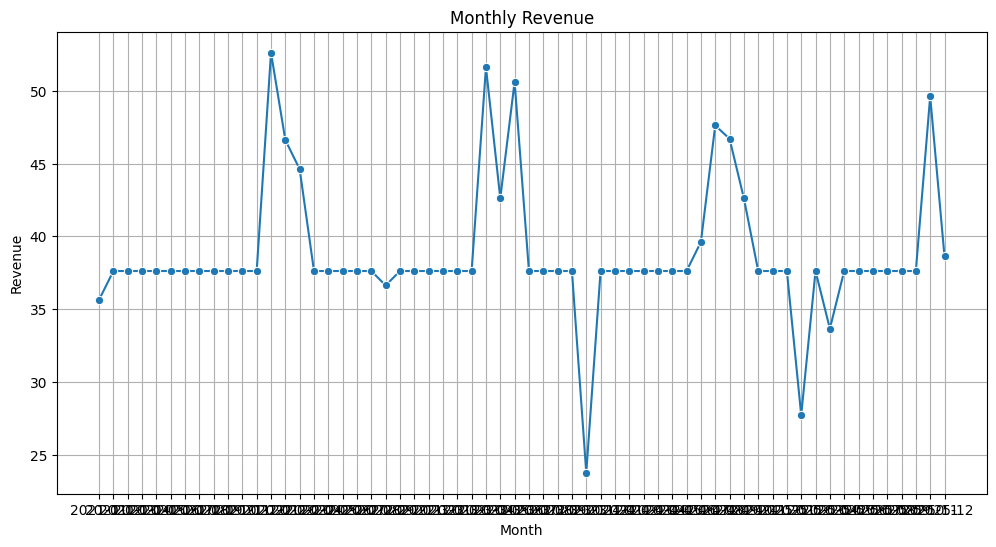

In [41]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='invoice_date', y='total', marker='o')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid()
plt.show()

Linechart atau `lineplot` digunakan untuk menunjukkan tren atau perubahan data dari waktu ke waktu atau interval berkelanjutan lainnya.

In [42]:
plot = px.line(
    monthly_revenue, 
    x='invoice_date', 
    y='total', 
    title='Monthly Revenue Over Time', 
    labels={'invoice_date': 'Month',
             'total': 'Total Revenue'
    })
plot.update_layout(width=800, height=400)
plot.show()

Nah, visualisasi yang lebih interaktif di atas menggunakan pustaka **plotly**.

Plotly adalah library yang dirancang khusus untuk membuat visualisasi data yang interaktif. Interaktivitas adalah Kunci: Ini adalah keunggulan terbesar Plotly. Grafik yang Anda buat bisa di-zoom, digeser (pan), dan saat Anda mengarahkan kursor ke titik data, akan muncul informasi detail (hover). Ini sangat berguna untuk eksplorasi data yang mendalam.

**Plotly Express (`px`)**: Sama seperti Seaborn yang menyederhanakan Matplotlib, Plotly memiliki Plotly Express (yang biasa disingkat `px`). Ini adalah antarmuka yang sangat mudah digunakan untuk membuat visualisasi Plotly yang kompleks dengan kode yang sangat singkat. Pada visualisasi di atas, linechart ditampilkan menggunakan `px.line()`.

### Explore Penjualan By Customer

In [43]:
customer_invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      412 non-null    int64         
 1   full_name        412 non-null    object        
 2   address          412 non-null    object        
 3   city             412 non-null    object        
 4   country          412 non-null    object        
 5   postal_code      384 non-null    object        
 6   phone            405 non-null    object        
 7   email            412 non-null    object        
 8   support_rep_id   412 non-null    int64         
 9   invoice_id       412 non-null    int64         
 10  invoice_date     412 non-null    datetime64[ns]
 11  billing_address  412 non-null    object        
 12  billing_city     412 non-null    object        
 13  billing_country  412 non-null    object        
 14  total            412 non-null    float64  

#### TOP customer sepanjang waktu

Membuat agregasi data menggunakan `.groupby` dan `.agg` kemudian mengurutkan data tersebut untuk memperoleh TOP value menggunakan `.sort_values`

In [44]:
top_customer = customer_invoice.groupby('full_name').agg({
    'total': 'sum'
    }).sort_values(
        by='total', 
        ascending=False).head(10).reset_index()
top_customer

,full_name,total
0,Helena Holý,49.62
1,Richard Cunningham,47.62
2,Luis Rojas,46.62
3,Hugh O'Reilly,45.62
4,Ladislav Kovács,45.62
5,Fynn Zimmermann,43.62
6,Frank Ralston,43.62
7,Julia Barnett,43.62
8,Astrid Gruber,42.62
9,Victor Stevens,42.62


parameter `sum` berfungsi untuk menjumlahkan data numerik

In [ ]:
# QUEST 1
#TODO : gunakan .describe() untuk melihat ringkasan statistik dari data top customer
# Tulis kode di bawah ini



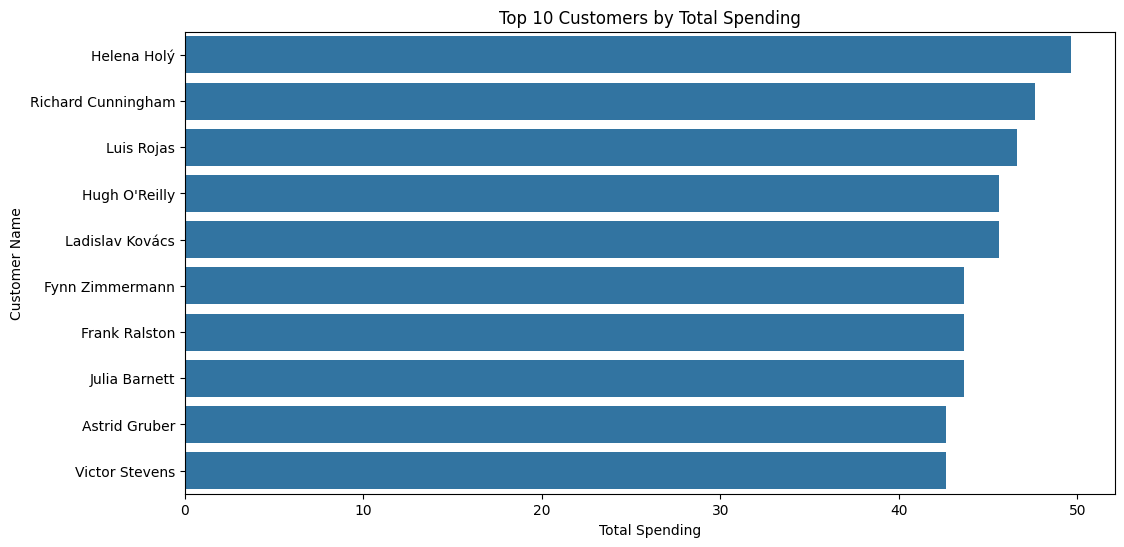

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_customer, 
    x='total',
    y='full_name',
)
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('Customer Name')
plt.show()

In [46]:
plot_top_customer = px.bar(
    top_customer.sort_values('total', ascending=True),
    x='total',
    y='full_name',
    title='Top 10 Customers by Total Spending',
    labels={'full_name': 'Customer Name', 'total': 'Total Spending'},
    orientation='h',
    color='total',
)
plot_top_customer.update_layout(width=800, height=400)
plot_top_customer

#### TOP customer 2023 - 2024

Membuat filter rentang waktu

In [93]:
periode_start = '2023-01-01'
periode_end = '2024-12-31'
periode_filer = (df_invoice['invoice_date'] >= periode_start) & (df_invoice['invoice_date'] <= periode_end)

In [95]:
periode_filer

0      False
1      False
2      False
3      False
4      False
       ...  
407    False
408    False
409    False
410    False
411    False
Name: invoice_date, Length: 412, dtype: bool

In [200]:
# QUEST : 2
# TODO gunakan .describe() untuk melihat ringkasan statistik dari data customer_invoice pada periode 2023-2024
customer_invoice[periode_filer] # tambahkan .describe() di akhir untuk melihat ringkasan statistik

,customer_id,support_rep_id,invoice_id,invoice_date,total
count,166.000000,166.000000,166.000000,166,166.000000
mean,36.072289,3.837349,208.656627,2023-07-05 21:49:52.771084288,5.680964
min,24.000000,3.000000,6.000000,2021-01-19 00:00:00,0.990000
25%,30.000000,3.000000,105.250000,2022-04-11 00:00:00,1.980000
50%,36.000000,4.000000,203.500000,2023-06-19 00:00:00,3.960000
75%,42.000000,5.000000,311.750000,2024-09-30 06:00:00,8.910000
max,48.000000,5.000000,411.000000,2025-12-14 00:00:00,23.860000
std,6.876897,0.826121,120.034980,NaN,4.898383


In [48]:
# QUEST : 3
# TODO lengkapilah kode berikut untuk mengagregasi total spending per customer pada periode 2023-2024 dan menampilkan 10 customer dengan total spending tertinggi

top_customer_2324 = customer_invoice[periode_filer].groupby('full_name').agg({
    # TODO: Hitung total spending per customer
    
    }).sort_values(
        # TODO: Urutkan data berdasarkan total
        by='', # lengkapi petik ini, 
        ascending=False).head(10).reset_index()
top_customer_2324

,full_name,total
0,Hugh O'Reilly,32.75
1,Victor Stevens,29.75
2,Richard Cunningham,26.83
3,Wyatt Girard,26.75
4,João Fernandes,26.75
5,Jack Smith,26.75
6,Bjørn Hansen,26.75
7,Daan Peeters,24.75
8,Fernanda Ramos,24.75
9,Joakim Johansson,24.75


C:\Users\RIZKA F\AppData\Local\Temp\ipykernel_28464\4240194659.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




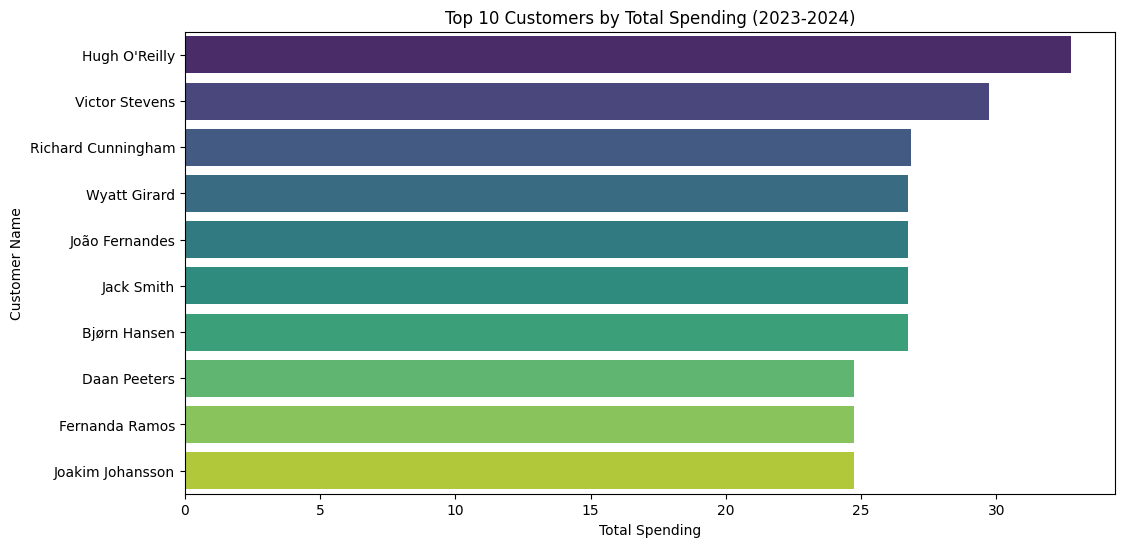

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_customer_2324,
    x='total',
    y='full_name',
    palette='viridis'
)
plt.title('Top 10 Customers by Total Spending (2023-2024)')
plt.xlabel('Total Spending')
plt.ylabel('Customer Name')
plt.show()

In [50]:
plot_top_customer_2324 = px.bar(
    top_customer_2324.sort_values('total', ascending=True),
    x='total',
    y='full_name',
    title='Top 10 Customers by Total Spending (2023-2024)',
    labels={'full_name': 'Customer Name', 'total': 'Total Spending'},
    orientation='h',
    color='total',
)
plot_top_customer_2324.update_layout(width=800, height=400)
plot_top_customer_2324.show()

### Explore Penjualan By Country

#### TOP penjualan berdasarkan negara sepanjang waktu

In [51]:
# QUEST 4
# TODO : lengkapilah kode berikut untuk mengagregasi total spending per country dan menampilkan 10 country dengan total spending tertinggi
top_country = customer_invoice.groupby('').agg({ # lengkapi petik di sini
    # TODO: Hitung total spending per country

    }) # urutkan negara berdasarkan total spending tertinggi



top_country

,country,total
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62


C:\Users\RIZKA F\AppData\Local\Temp\ipykernel_28464\2603450469.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




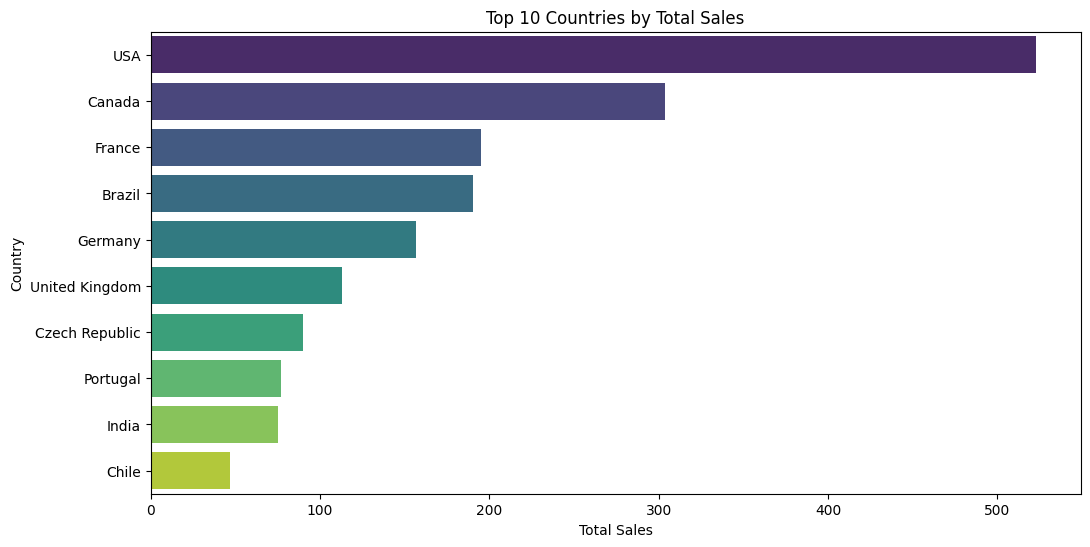

In [52]:
# QUEST 5
# TODO : buatlah visualisasi menggunakan barplot untuk menampilkan 10 country dengan total spending tertinggi
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_country,
    x='', # isi x dengan total
    y='', # isi y dengan country
    palette='viridis'
)
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()

In [53]:
top_country_plot = px.bar(
    top_country.sort_values('total', ascending=True),
    x='total',
    y='country',
    title='Top 10 Countries by Total Sales',
    labels={'country': 'Country', 'total': 'Total Sales'},
    orientation='h',
    color='total',
)
top_country_plot.update_layout(width=800, height=400)
top_country_plot.show()

`px.bar()` digunakan untuk membuat barplot

In [54]:
plot_top_country_map = px.scatter_geo(
    top_country,
    locations='country',
    locationmode='country names',
    color='total',
    hover_name='country',
    size='total',
    projection='natural earth',
    title='Top 10 Countries by Total Sales (2023-2024)',
    color_continuous_scale=px.colors.sequential.Plasma
)
plot_top_country_map.update_layout(width=800, height=400)
plot_top_country_map.show()

C:\Users\RIZKA F\AppData\Local\Temp\ipykernel_28464\2057499759.py:1: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



Visualisasi di atas menggunakan `px.scatter_geo()` untuk memvisualisasikan sebaran di peta dunia yang interaktif.

- `top_country` : dataframe yang digunakan
- `locations` : lokasi yang akan ditampilkan di peta
- `locationmode='country names'` : Memberi tahu Plotly bahwa data di kolom 'country' adalah nama negara (misalnya, "USA", "Indonesia"), bukan kode negara (seperti "USA", "IDN").
- `color='total'` : Warna setiap titik di peta akan ditentukan oleh nilai pada kolom 'total'. Semakin tinggi total penjualan, semakin cerah/berbeda warnanya.
- `hover_name` : membuat interaksi hover
- `size='total'` : Ukuran setiap titik di peta juga akan ditentukan oleh nilai pada kolom 'total'. Negara dengan penjualan lebih besar akan memiliki titik yang lebih besar.
- `projection='natural earth'` : Memilih jenis proyeksi peta agar terlihat lebih natural.
- `color_continuous_scale=...Plasma` : Mengatur skema warna yang akan digunakan. Plasma adalah salah satu palet warna bawaan dari Plotly.

#### TOP Penjualan berdasarkan Negara 2023 - 2024

In [55]:
# QUEST 6
# TODO perbaiki filter pada kode berikut
top_country_2324 = customer_invoice['2023-2024'].groupby('country').agg({ # kode ini kemungkinan salah, perbaikilah
    'total': 'sum'
    }).sort_values(
        by='total', 
        ascending=False).head(10).reset_index()
top_country_2324

,country,total
0,USA,230.99
1,Canada,98.01
2,France,79.27
3,Brazil,73.26
4,Germany,67.38
5,India,35.64
6,Portugal,33.68
7,Ireland,32.75
8,Czech Republic,32.70
9,United Kingdom,27.72


In [56]:
# QUEST 7
# TODO buatlah visualisasi menggunakan barplot untuk menampilkan 10 country dengan total spending pada periode 2023-2024
plot_top_country_2324 = px.bar(
    top_country_2324.sort_values('total', ascending=True),
    # TODO lengkapi kode di bawah ini
    
    
    
    
    
    
)
plot_top_country_2324.update_layout(width=800, height=400)
plot_top_country_2324.show()

In [57]:
plot_top_country_2324_map = px.scatter_geo(
    top_country_2324,
    locations='country',
    locationmode='country names',
    color='total',
    hover_name='country',
    size='total',
    projection='natural earth',
    title='Top 10 Countries by Total Sales (2023-2024)',
    color_continuous_scale=px.colors.sequential.Plasma
)
plot_top_country_2324_map.update_layout(width=800, height=400)
plot_top_country_2324_map.show()

C:\Users\RIZKA F\AppData\Local\Temp\ipykernel_28464\394494553.py:1: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



### Explore performa penjualan

#### Persentase penjualan sepanjang waktu

Menghitung total revenue

In [58]:
total_revenue = customer_invoice['total'].sum()
total_revenue

np.float64(2328.6)

Mengetahui total spending per customer

In [59]:
spending_per_customer = customer_invoice.groupby('full_name').agg({
    'total': 'sum'
}).reset_index()
spending_per_customer

,full_name,total
0,Aaron Mitchell,37.62
1,Alexandre Rocha,37.62
2,Astrid Gruber,42.62
3,Bjørn Hansen,39.62
4,Camille Bernard,38.62
5,Daan Peeters,37.62
6,Dan Miller,39.62
7,Diego Gutiérrez,37.62
8,Dominique Lefebvre,38.62
9,Eduardo Martins,37.62


In [ ]:
# QUEST 8
# TODO gunakan .describe() untuk melihat ringkasan statistik dari data spending_per_customer



Mengetahui persentase kontribusi pembelian customer terhadap total pendapatan

In [60]:
spending_per_customer['percentage_of_total'] = (spending_per_customer['total'] / total_revenue) * 100
spending_per_customer.sort_values('percentage_of_total', ascending=False)

,full_name,total,percentage_of_total
22,Helena Holý,49.62,2.130894
50,Richard Cunningham,47.62,2.045006
37,Luis Rojas,46.62,2.002061
23,Hugh O'Reilly,45.62,1.959117
34,Ladislav Kovács,45.62,1.959117
19,Fynn Zimmermann,43.62,1.873229
16,Frank Ralston,43.62,1.873229
31,Julia Barnett,43.62,1.873229
2,Astrid Gruber,42.62,1.830284
57,Victor Stevens,42.62,1.830284


#### Persentase penjualan 2023 - 2024

In [61]:
# QUEST 9 
# TODO : hitung total revenue pada periode 2023-2024
total_revenue_2324 = customer_invoice # lengkapi blok ini
total_revenue_2324

np.float64(947.1100000000001)

In [62]:
# QUEST 10
# TODO : hitung persentase kontribusi pembelian customer terhadap total pendapatan pada periode 2023-2024
spending_per_customer_2324 = customer_invoice[periode_filer].groupby('full_name').agg({
    'total': 'sum'
}).reset_index()
spending_per_customer_2324['percentage_of_total'] = (spending_per_customer_2324['total'] / total_revenue_2324) # kali seratus
spending_per_customer_2324.sort_values('percentage_of_total', ascending=False)

,full_name,total,percentage_of_total
23,Hugh O'Reilly,32.75,3.457888
57,Victor Stevens,29.75,3.141135
50,Richard Cunningham,26.83,2.832828
58,Wyatt Girard,26.75,2.824382
30,João Fernandes,26.75,2.824382
25,Jack Smith,26.75,2.824382
3,Bjørn Hansen,26.75,2.824382
5,Daan Peeters,24.75,2.613213
14,Fernanda Ramos,24.75,2.613213
27,Joakim Johansson,24.75,2.613213


### Explore Penjualan by Track (Genre)

In [63]:
track_popularity = df_track.merge(
    df_invoice_line, 
    how='left',
    left_on='track_id',
    right_on='track_id'
)
track_popularity

,track_id,song_name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price_x,genre_name,title,artist_id,artist_name,invoice_line_id,invoice_id,unit_price_y,quantity
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,Rock,For Those About To Rock We Salute You,1,AC/DC,579.0,108.0,0.99,1.0
1,2,Balls to the Wall,2,2,1,"U. Dirkschneider, W. Hoffmann, H. Frank, P. Ba...",342562,5510424,0.99,Rock,Balls to the Wall,2,Accept,1.0,1.0,0.99,1.0
2,2,Balls to the Wall,2,2,1,"U. Dirkschneider, W. Hoffmann, H. Frank, P. Ba...",342562,5510424,0.99,Rock,Balls to the Wall,2,Accept,1154.0,214.0,0.99,1.0
3,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99,Rock,Restless and Wild,2,Accept,1728.0,319.0,0.99,1.0
4,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99,Rock,Restless and Wild,2,Accept,2.0,1.0,0.99,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99,Classical,Schubert: The Late String Quartets & String Qu...,272,Emerson String Quartet,578.0,108.0,0.99,1.0
3755,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99,Classical,Schubert: The Late String Quartets & String Qu...,272,Emerson String Quartet,1727.0,319.0,0.99,1.0
3756,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99,Classical,Monteverdi: L'Orfeo,273,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon...",NaN,NaN,NaN,NaN
3757,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99,Classical,Mozart: Chamber Music,274,Nash Ensemble,NaN,NaN,NaN,NaN


In [64]:
# QUEST 11
# TODO : gabungkan data track_popularity dengan df_invoice untuk mendapatkan informasi invoice_date dan customer
track_popularity = track_popularity.merge(
    # TODO lengkapi kode berikut
    
    
    
    
)
track_popularity

,track_id,song_name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price_x,genre_name,...,invoice_line_id,invoice_id,unit_price_y,quantity,customer_id,invoice_date,billing_address,billing_city,billing_country,total
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,Rock,...,579.0,108.0,0.99,1.0,47.0,2022-04-13,"Via Degli Scipioni, 43",Rome,Italy,5.94
1,2,Balls to the Wall,2,2,1,"U. Dirkschneider, W. Hoffmann, H. Frank, P. Ba...",342562,5510424,0.99,Rock,...,1.0,1.0,0.99,1.0,2.0,2021-01-01,Theodor-Heuss-Straße 34,Stuttgart,Germany,1.98
2,2,Balls to the Wall,2,2,1,"U. Dirkschneider, W. Hoffmann, H. Frank, P. Ba...",342562,5510424,0.99,Rock,...,1154.0,214.0,0.99,1.0,33.0,2023-07-25,5112 48 Street,Yellowknife,Canada,8.91
3,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99,Rock,...,1728.0,319.0,0.99,1.0,13.0,2024-11-01,Qe 7 Bloco G,Brasília,Brazil,8.91
4,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99,Rock,...,2.0,1.0,0.99,1.0,2.0,2021-01-01,Theodor-Heuss-Straße 34,Stuttgart,Germany,1.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99,Classical,...,578.0,108.0,0.99,1.0,47.0,2022-04-13,"Via Degli Scipioni, 43",Rome,Italy,5.94
3755,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99,Classical,...,1727.0,319.0,0.99,1.0,13.0,2024-11-01,Qe 7 Bloco G,Brasília,Brazil,8.91
3756,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99,Classical,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3757,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99,Classical,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


#### Genre Teratas (Quantity)

In [67]:
# QUEST 12
# TODO : buat agregasi/pivot table untuk mengetahui genre apa yang paling banyak terjual (quantity) dan memberikan kontribusi terbesar terhadap total revenue (total)
top_genre = track_popularity.groupby('genre_name')



top_genre

,genre_name,quantity,total
0,Rock,835.0,7720.02
1,Latin,386.0,3472.55
2,Metal,264.0,2093.13
3,Alternative & Punk,244.0,1961.66
4,Jazz,80.0,746.46
5,Blues,61.0,429.66
6,TV Shows,47.0,817.71
7,R&B/Soul,41.0,338.62
8,Classical,41.0,317.04
9,Reggae,30.0,332.64


#### Genre Teratas (Total Revenue)

In [68]:
# QUEST 13
# TODO : urutkan data top_genre berdasarkan total revenue (total)



,genre_name,quantity,total
0,Rock,835.0,7720.02
1,Latin,386.0,3472.55
2,Metal,264.0,2093.13
3,Alternative & Punk,244.0,1961.66
4,Jazz,80.0,746.46
5,Blues,61.0,429.66
6,TV Shows,47.0,817.71
7,R&B/Soul,41.0,338.62
8,Classical,41.0,317.04
9,Reggae,30.0,332.64


C:\Users\RIZKA F\AppData\Local\Temp\ipykernel_28464\394047572.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\RIZKA F\AppData\Local\Temp\ipykernel_28464\394047572.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




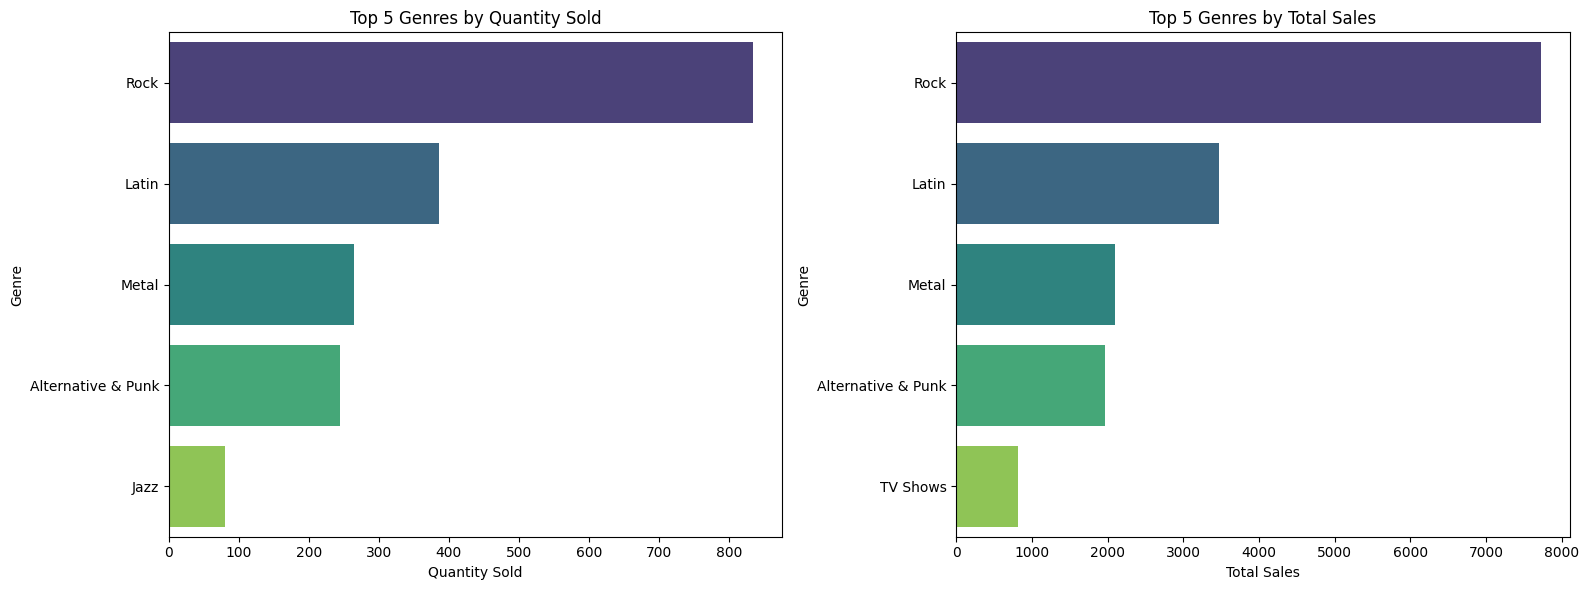

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(
    data=top_genre.sort_values(by='quantity', ascending=False).head(5),
    x='quantity',
    y='genre_name',
    palette='viridis',
    ax=ax[0]
)
ax[0].set_title('Top 5 Genres by Quantity Sold')
ax[0].set_xlabel('Quantity Sold')
ax[0].set_ylabel('Genre')

sns.barplot(
    data=top_genre.sort_values(by='total', ascending=False).head(5),
    x='total',
    y='genre_name',
    palette='viridis',
    ax=ax[1]
)
ax[1].set_title('Top 5 Genres by Total Sales')
ax[1].set_xlabel('Total Sales')
ax[1].set_ylabel('Genre')

plt.tight_layout()
plt.show()

In [149]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Top Genre by Quantity', 'Top Genre by Sales'))
fig.add_trace(
    go.Bar(
        x=top_genre.head(5).sort_values(by='quantity', ascending=True)['quantity'],
        y=top_genre.head(5).sort_values(by='quantity', ascending=True)['genre_name'],
        orientation='h',
        marker_color='skyblue',
        name='Quantity'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=top_genre.head(5).sort_values(by='total', ascending=True)['total'],
        y=top_genre.head(5).sort_values(by='total', ascending=True)['genre_name'],
        orientation='h',
        # marker_color='skyblue',
        name='Total Sales'
    ),
    row=1, col=2
)

fig.update_layout(height=500, width=1000, showlegend=False)
fig.update_xaxes(title_text="Quantity", row=1, col=1)
fig.update_xaxes(title_text="Revenue", row=1, col=2)
fig.update_yaxes(title_text="Genre", row=1, col=1)
fig.update_yaxes(title_text="Genre", row=1, col=2)
fig.show()

#### TOP genre 2023 - 2024 (triwulan)

In [92]:
track_popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3759 entries, 0 to 3758
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   track_id         3759 non-null   int64         
 1   song_name        3759 non-null   object        
 2   album_id         3759 non-null   int64         
 3   media_type_id    3759 non-null   int64         
 4   genre_id         3759 non-null   int64         
 5   composer         3759 non-null   object        
 6   milliseconds     3759 non-null   int64         
 7   bytes            3759 non-null   int64         
 8   unit_price_x     3759 non-null   float64       
 9   genre_name       3759 non-null   object        
 10  title            3759 non-null   object        
 11  artist_id        3759 non-null   int64         
 12  artist_name      3759 non-null   object        
 13  invoice_line_id  2240 non-null   float64       
 14  invoice_id       2240 non-null   float64

In [98]:
periode_start = '2023-01-01'
periode_end = '2024-12-31'

track_popularity_2324 = track_popularity[
    (track_popularity['invoice_date'] >= periode_start) &
    (track_popularity['invoice_date'] <= periode_end)
]
track_popularity_2324

,track_id,song_name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price_x,genre_name,...,invoice_line_id,invoice_id,unit_price_y,quantity,customer_id,invoice_date,billing_address,billing_city,billing_country,total
2,2,Balls to the Wall,2,2,1,"U. Dirkschneider, W. Hoffmann, H. Frank, P. Ba...",342562,5510424,0.99,Rock,...,1154.0,214.0,0.99,1.0,33.0,2023-07-25,5112 48 Street,Yellowknife,Canada,8.91
3,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99,Rock,...,1728.0,319.0,0.99,1.0,13.0,2024-11-01,Qe 7 Bloco G,Brasília,Brazil,8.91
9,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99,Rock,...,1155.0,214.0,0.99,1.0,33.0,2023-07-25,5112 48 Street,Yellowknife,Canada,8.91
11,9,Snowballed,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99,Rock,...,1729.0,319.0,0.99,1.0,13.0,2024-11-01,Qe 7 Bloco G,Brasília,Brazil,8.91
16,14,Spellbound,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",270863,8817038,0.99,Rock,...,1156.0,214.0,0.99,1.0,33.0,2023-07-25,5112 48 Street,Yellowknife,Canada,8.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,3489,Symphony No. 2: III. Allegro vivace,334,2,24,Kurt Weill,376510,6129146,0.99,Classical,...,1151.0,213.0,0.99,1.0,27.0,2023-07-22,1033 N Park Ave,Tucson,USA,5.94
3747,3493,"Metopes, Op. 29: Calypso",337,2,24,Karol Szymanowski,333669,5548755,0.99,Classical,...,1152.0,213.0,0.99,1.0,27.0,2023-07-22,1033 N Park Ave,Tucson,USA,5.94
3748,3494,"Symphony No. 2, Op. 16 - ""The Four Temperamen...",338,2,24,Carl Nielsen,286998,4834785,0.99,Classical,...,1726.0,319.0,0.99,1.0,13.0,2024-11-01,Qe 7 Bloco G,Brasília,Brazil,8.91
3753,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,Eugene Ormandy,286741,4718950,0.99,Classical,...,1153.0,214.0,0.99,1.0,33.0,2023-07-25,5112 48 Street,Yellowknife,Canada,8.91


`.dt.to_period('Q')` berguna untuk mengelompokkan data berdasarkan quarter atau triwulan

In [101]:
track_popularity_2324['quarter'] = track_popularity_2324['invoice_date'].dt.to_period('Q')
track_popularity_2324

C:\Users\RIZKA F\AppData\Local\Temp\ipykernel_28464\305548186.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,track_id,song_name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price_x,genre_name,...,invoice_id,unit_price_y,quantity,customer_id,invoice_date,billing_address,billing_city,billing_country,total,quarter
2,2,Balls to the Wall,2,2,1,"U. Dirkschneider, W. Hoffmann, H. Frank, P. Ba...",342562,5510424,0.99,Rock,...,214.0,0.99,1.0,33.0,2023-07-25,5112 48 Street,Yellowknife,Canada,8.91,2023Q3
3,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99,Rock,...,319.0,0.99,1.0,13.0,2024-11-01,Qe 7 Bloco G,Brasília,Brazil,8.91,2024Q4
9,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99,Rock,...,214.0,0.99,1.0,33.0,2023-07-25,5112 48 Street,Yellowknife,Canada,8.91,2023Q3
11,9,Snowballed,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99,Rock,...,319.0,0.99,1.0,13.0,2024-11-01,Qe 7 Bloco G,Brasília,Brazil,8.91,2024Q4
16,14,Spellbound,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",270863,8817038,0.99,Rock,...,214.0,0.99,1.0,33.0,2023-07-25,5112 48 Street,Yellowknife,Canada,8.91,2023Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,3489,Symphony No. 2: III. Allegro vivace,334,2,24,Kurt Weill,376510,6129146,0.99,Classical,...,213.0,0.99,1.0,27.0,2023-07-22,1033 N Park Ave,Tucson,USA,5.94,2023Q3
3747,3493,"Metopes, Op. 29: Calypso",337,2,24,Karol Szymanowski,333669,5548755,0.99,Classical,...,213.0,0.99,1.0,27.0,2023-07-22,1033 N Park Ave,Tucson,USA,5.94,2023Q3
3748,3494,"Symphony No. 2, Op. 16 - ""The Four Temperamen...",338,2,24,Carl Nielsen,286998,4834785,0.99,Classical,...,319.0,0.99,1.0,13.0,2024-11-01,Qe 7 Bloco G,Brasília,Brazil,8.91,2024Q4
3753,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,Eugene Ormandy,286741,4718950,0.99,Classical,...,214.0,0.99,1.0,33.0,2023-07-25,5112 48 Street,Yellowknife,Canada,8.91,2023Q3


In [104]:
# QUEST 14
# TODO : buat agregasi/pivot table untuk mengetahui genre apa yang paling banyak terjual (quantity) dan memberikan kontribusi terbesar terhadap total revenue (total) pada periode 2023-2024, kemudian kelompokkan berdasarkan quarter
genre_quarter = track_popularity_2324.groupby([
    # TODO lengkapi kode di bawah ini

    
    ]).agg({
    'quantity': 'sum',
    'total': 'sum'
}).reset_index()
genre_quarter

,quarter,genre_name,quantity,total
0,2023Q1,Alternative & Punk,21.0,200.97
1,2023Q1,Blues,8.0,44.55
2,2023Q1,Hip Hop/Rap,1.0,13.86
3,2023Q1,Jazz,4.0,6.93
4,2023Q1,Latin,12.0,42.57
...,...,...,...,...
88,2024Q4,Rock,19.0,206.01
89,2024Q4,Rock And Roll,2.0,27.72
90,2024Q4,Sci Fi & Fantasy,1.0,10.91
91,2024Q4,Soundtrack,2.0,27.72


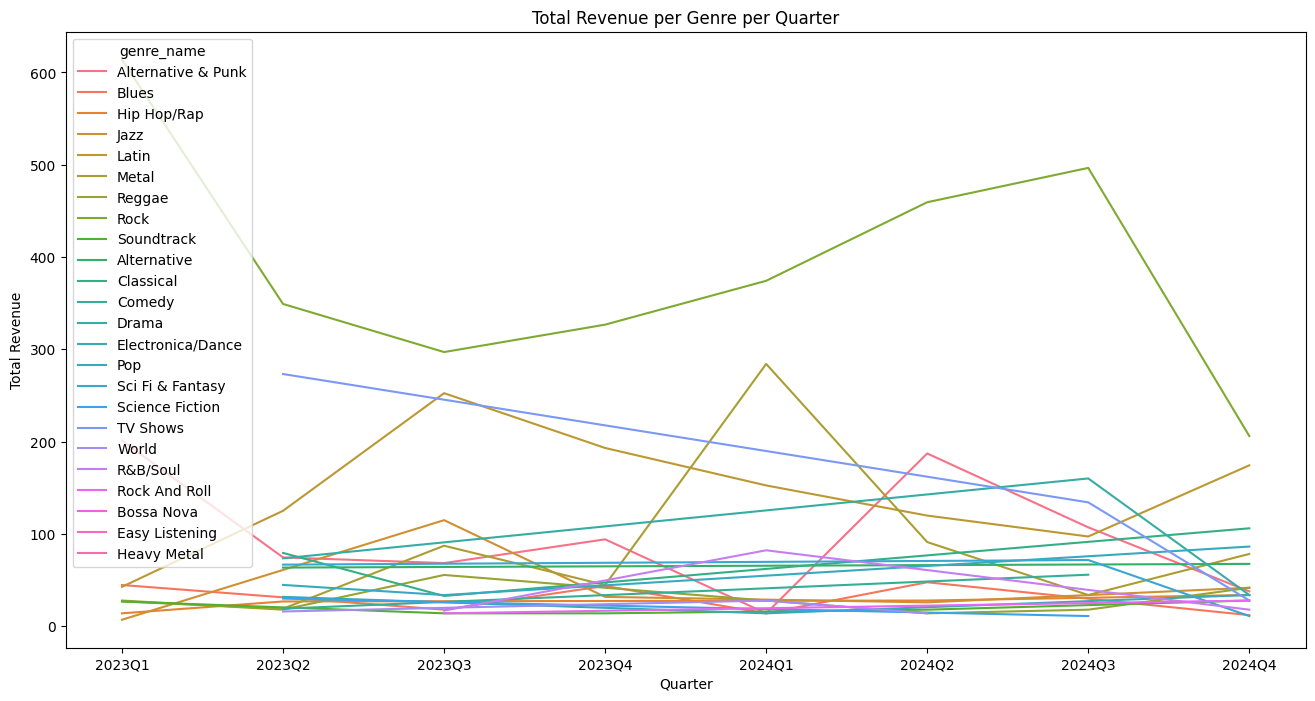

In [120]:
genre_quarter['quarter'] = genre_quarter['quarter'].astype(str)

plt.figure(figsize=(16, 8))
sns.lineplot(
    data=genre_quarter, 
    x='quarter', 
    y='total', 
    hue='genre_name'
)
plt.title('Total Revenue per Genre per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
# plt.tight_layout()
plt.show()

In [115]:
plot_genre_quarter_2324 = px.line(
    genre_quarter,
    x='quarter',
    y='total',
    color='genre_name',
    title='Genre Sales Trend 2023 - 2024'
)
plot_genre_quarter_2324.update_layout(width=800, height=400)
plot_genre_quarter_2324.show()

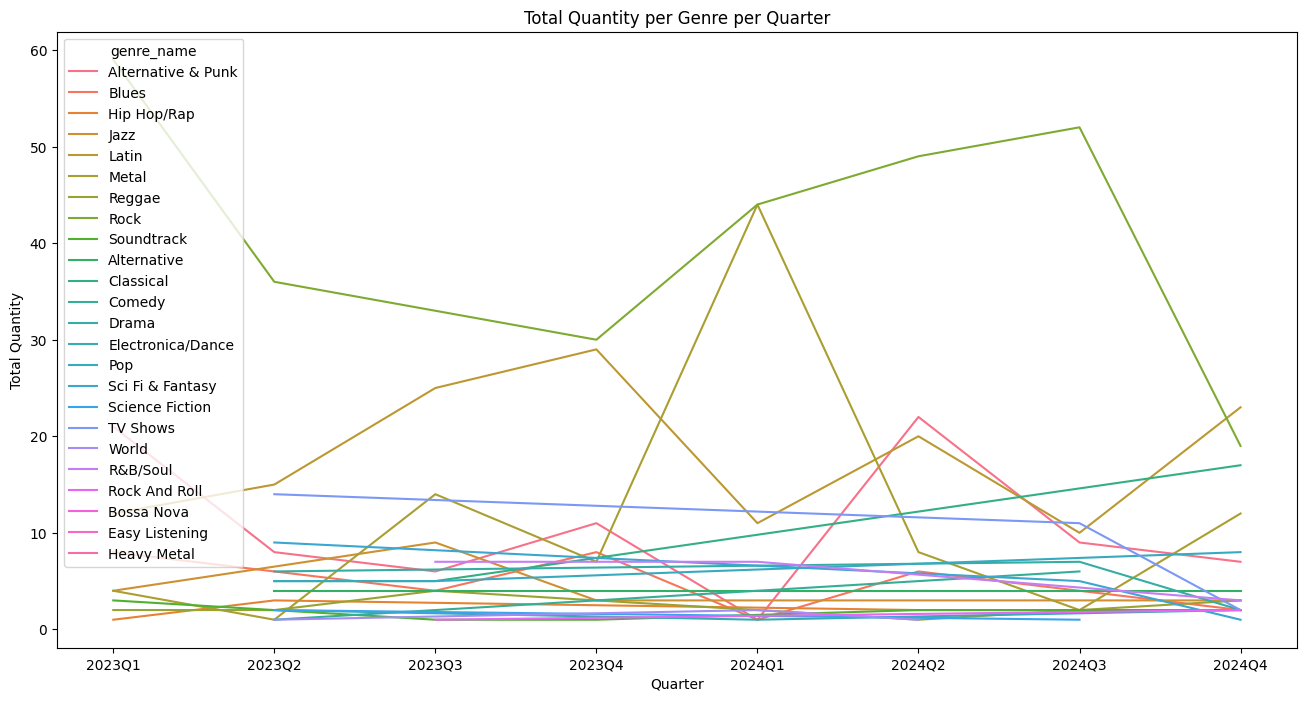

In [167]:
genre_quarter['quarter'] = genre_quarter['quarter'].astype(str)

plt.figure(figsize=(16, 8))
sns.lineplot(
    data=genre_quarter, 
    x='quarter', 
    y='quantity', 
    hue='genre_name'
)
plt.title('Total Quantity per Genre per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Quantity')
# plt.tight_layout()
plt.show()

In [166]:
plot_genre_quarter_2324 = px.line(
    genre_quarter,
    x='quarter',
    y='quantity',
    color='genre_name',
    title='Genre Quantity Trend 2023 - 2024'
)
plot_genre_quarter_2324.update_layout(width=800, height=400)
plot_genre_quarter_2324.show()

### Explore Penjualan by Track (Artist)

In [145]:
# QUEST 15
# TODO : buat agregasi/pivot table untuk mengetahui artist apa yang paling banyak terjual (quantity) dan memberikan kontribusi terbesar terhadap total revenue (total)
top_artist = track_popularity.groupby('artist_name').agg({
    # TODO lengkapi kode di bawah ini

    
}).reset_index()
top_artist

,artist_name,quantity,total
0,AC/DC,16.0,107.91
1,Aaron Copland & London Symphony Orchestra,0.0,0.00
2,Aaron Goldberg,0.0,0.00
3,Academy of St. Martin in the Fields & Sir Nevi...,1.0,1.98
4,Academy of St. Martin in the Fields Chamber En...,0.0,0.00
...,...,...,...
199,Vinícius De Moraes,6.0,104.16
200,Wilhelm Kempff,0.0,0.00
201,Yehudi Menuhin,1.0,1.98
202,Yo-Yo Ma,1.0,16.86


In [201]:
track_popularity.describe()

,track_id,album_id,media_type_id,genre_id,milliseconds,bytes,unit_price_x,artist_id,invoice_line_id,invoice_id,unit_price_y,quantity,customer_id,invoice_date,total
count,3759.000000,3759.000000,3759.000000,3759.000000,3.759000e+03,3.759000e+03,3759.000000,3759.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.000000,2240,2240.000000
mean,1745.795158,140.512104,1.202980,5.650705,3.884790e+05,3.257527e+07,1.048792,93.651503,1120.500000,206.868750,1.039554,1.0,29.974107,2023-06-25 13:42:12.857142784,9.307420
min,1.000000,1.000000,1.000000,1.000000,1.071000e+03,3.874700e+04,0.990000,1.000000,1.000000,1.000000,0.990000,1.0,1.000000,2021-01-01 00:00:00,0.990000
25%,874.500000,70.000000,1.000000,1.000000,2.066935e+05,6.329877e+06,0.990000,52.000000,560.750000,103.000000,0.990000,1.0,15.000000,2022-03-21 00:00:00,5.940000
50%,1746.000000,141.000000,1.000000,3.000000,2.555290e+05,8.101979e+06,0.990000,90.000000,1120.500000,207.000000,0.990000,1.0,30.000000,2023-06-24 00:00:00,8.910000
75%,2615.500000,211.000000,1.000000,7.000000,3.210575e+05,1.023119e+07,0.990000,134.000000,1680.250000,311.000000,0.990000,1.0,45.000000,2024-09-28 00:00:00,13.860000
max,3503.000000,347.000000,5.000000,25.000000,5.286953e+06,1.059546e+09,1.990000,275.000000,2240.000000,412.000000,1.990000,1.0,59.000000,2025-12-22 00:00:00,25.860000
std,1008.467630,81.597803,0.571201,6.119668,5.249629e+05,1.033811e+08,0.235267,53.489698,646.776623,119.134877,0.217069,0.0,17.018715,NaN,5.115131


#### Artis Teratas (Quantity)

In [139]:
# QUEST 16
# TODO urutkan data top_artist berdasarkan quantity

top_artist

,artist_name,quantity,total
0,AC/DC,16.0,107.91
1,Aaron Copland & London Symphony Orchestra,0.0,0.00
2,Aaron Goldberg,0.0,0.00
3,Academy of St. Martin in the Fields & Sir Nevi...,1.0,1.98
4,Academy of St. Martin in the Fields Chamber En...,0.0,0.00
...,...,...,...
199,Vinícius De Moraes,6.0,104.16
200,Wilhelm Kempff,0.0,0.00
201,Yehudi Menuhin,1.0,1.98
202,Yo-Yo Ma,1.0,16.86


#### Artis Teratas (Total Revenue)

In [140]:
# QUEST 17
# TODO urutkan data top_artist berdasarkan total

top_artist

,artist_name,quantity,total
0,AC/DC,16.0,107.91
1,Aaron Copland & London Symphony Orchestra,0.0,0.00
2,Aaron Goldberg,0.0,0.00
3,Academy of St. Martin in the Fields & Sir Nevi...,1.0,1.98
4,Academy of St. Martin in the Fields Chamber En...,0.0,0.00
...,...,...,...
199,Vinícius De Moraes,6.0,104.16
200,Wilhelm Kempff,0.0,0.00
201,Yehudi Menuhin,1.0,1.98
202,Yo-Yo Ma,1.0,16.86


C:\Users\RIZKA F\AppData\Local\Temp\ipykernel_28464\232910430.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\RIZKA F\AppData\Local\Temp\ipykernel_28464\232910430.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




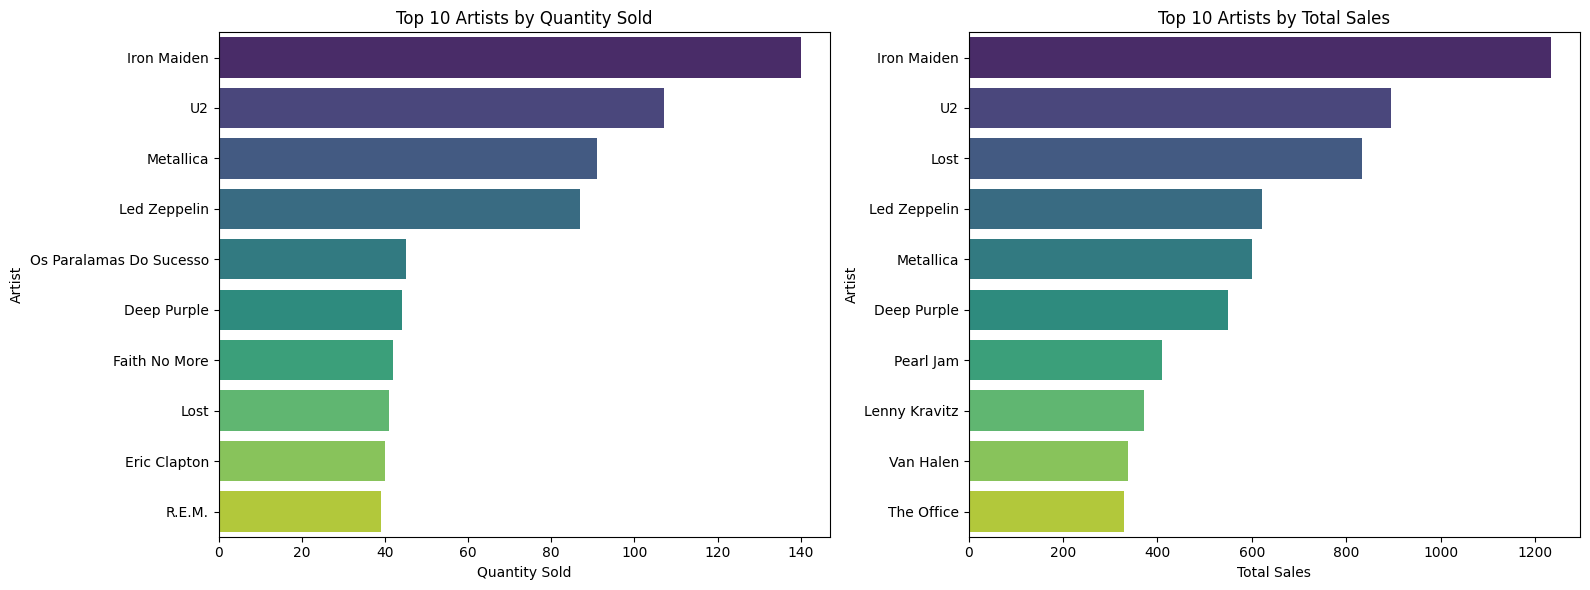

In [142]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(
    data=top_artist.sort_values(by='quantity', ascending=False).head(10),
    x='quantity',
    y='artist_name',
    ax=ax[0],
    palette='viridis'
)
sns.barplot(
    data=top_artist.sort_values(by='total', ascending=False).head(10),
    x='total',
    y='artist_name',
    ax=ax[1],
    palette='viridis'
)
ax[0].set_title('Top 10 Artists by Quantity Sold')
ax[0].set_xlabel('Quantity Sold')
ax[0].set_ylabel('Artist')
ax[1].set_title('Top 10 Artists by Total Sales')
ax[1].set_xlabel('Total Sales')
ax[1].set_ylabel('Artist')
plt.tight_layout()
plt.show()

In [148]:
top5_quantity = top_artist.sort_values(by='quantity', ascending=False).head(5).sort_values(by='quantity', ascending=True)
top5_total = top_artist.sort_values(by='total', ascending=False).head(5).sort_values(by='total', ascending=True)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Top Artists by Quantity', 'Top Artists by Sales'))

fig.add_trace(
    go.Bar(
        x=top5_quantity['quantity'],
        y=top5_quantity['artist_name'],
        orientation='h',
        marker_color='skyblue',
        name='Quantity'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=top5_total['total'],
        y=top5_total['artist_name'],
        orientation='h',
        marker_color='orange',
        name='Total Sales'
    ),
    row=1, col=2
)

fig.update_layout(height=500, width=1000, showlegend=False)
fig.update_xaxes(title_text="Quantity", row=1, col=1)
fig.update_xaxes(title_text="Revenue", row=1, col=2)
fig.update_yaxes(title_text="Artist", row=1, col=1)
fig.update_yaxes(title_text="Artist", row=1, col=2)
fig.show()
# ...existing code...

#### TOP artist 2023 - 2024 (triwulan)

In [150]:
# QUEST 18
# TODO buat agregasi/pivot table untuk mengetahui artist apa yang paling banyak terjual (quantity) dan memberikan kontribusi terbesar terhadap total revenue (total) pada periode 2023-2024, kemudian kelompokkan berdasarkan quarter
artist_quarter = track_popularity_2324.groupby([
    # TODO lengkapi kode di bawah ini
    
    'artist_name']).agg({
    'quantity': 'sum',
    'total': 'sum'
}).reset_index()
artist_quarter

,quarter,artist_name,quantity,total
0,2023Q1,Lenny Kravitz,3.0,41.58
1,2023Q1,Os Paralamas Do Sucesso,12.0,42.57
2,2023Q1,Ozzy Osbourne,4.0,26.73
3,2023Q1,Page & Plant,2.0,17.82
4,2023Q1,Passengers,3.0,26.73
...,...,...,...,...
249,2024Q4,Temple of the Dog,1.0,16.86
250,2024Q4,The Posies,1.0,16.86
251,2024Q4,U2,4.0,43.64
252,2024Q4,Various Artists,4.0,55.44


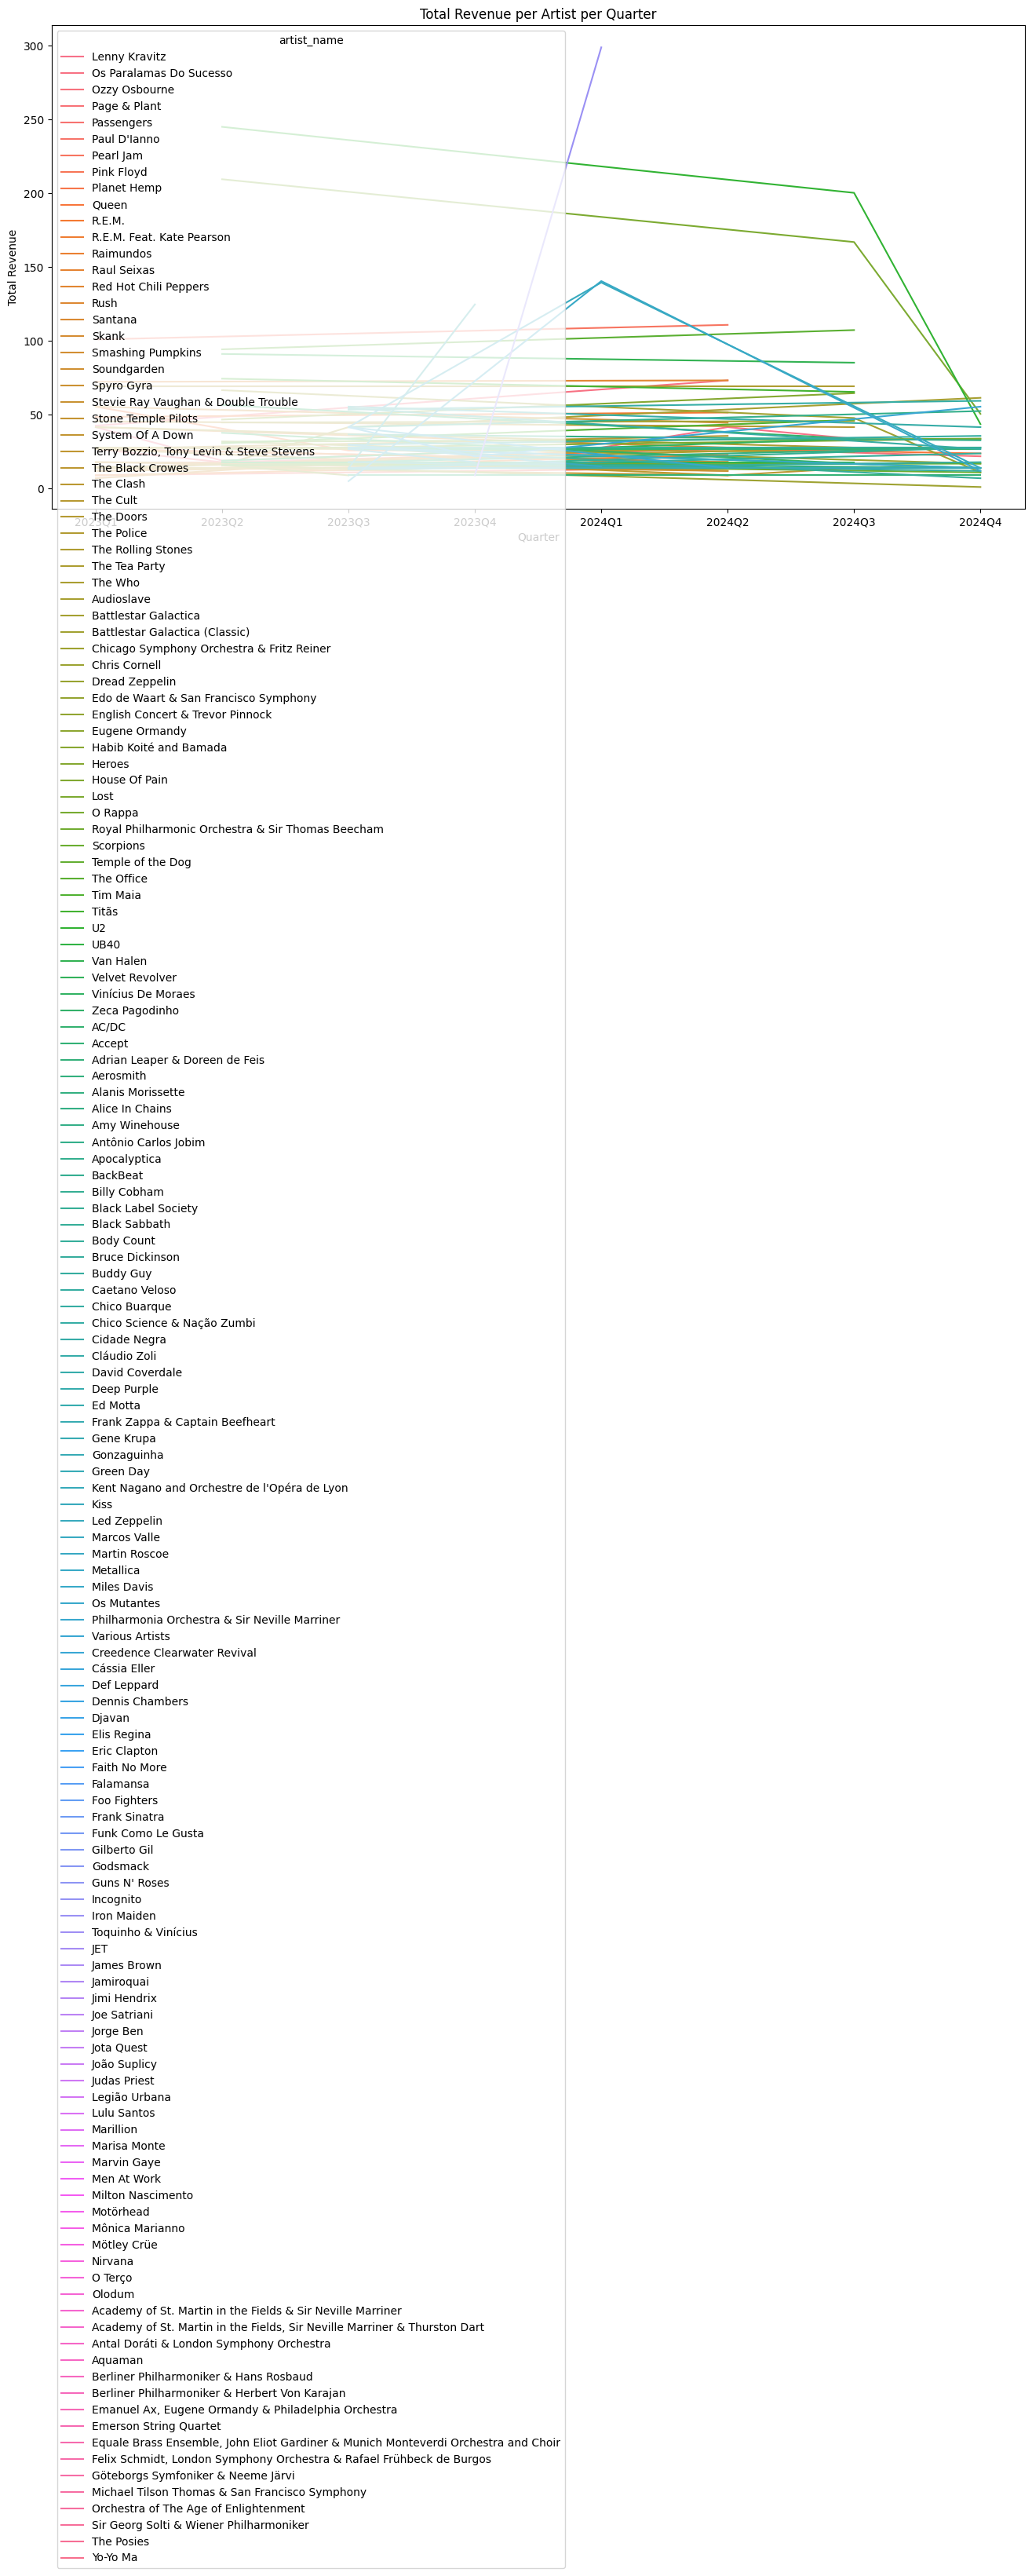

In [202]:
artist_quarter['quarter'] = artist_quarter['quarter'].astype(str)

plt.figure(figsize=(16, 8))
sns.lineplot(
    data=artist_quarter, 
    x='quarter', 
    y='total', 
    hue='artist_name'
)
plt.title('Total Revenue per Artist per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.show()

In [169]:
# QUEST 19
# TODO lengkapi kode untuk membuat visualisasi menggunakan line plot berikut
plot_artist_quarter_2324 = px.line(
    # TODO lengkapi kode di bawah ini

    x='',
    y='',
    color='artist_name',
    title='Artist Quantity Trend 2023 - 2024'
)
plot_artist_quarter_2324.update_layout(width=1200, height=400)
plot_artist_quarter_2324.show()

### Explore support rep

#### support rep by country

In [190]:
support_rep = customer_invoice.groupby(['support_rep_id', 'country']).agg({
    'customer_id': 'count',
}).reset_index()
support_rep

,support_rep_id,country,customer_id
0,3,Brazil,14
1,3,Canada,35
2,3,Finland,7
3,3,France,14
4,3,Germany,14
5,3,Hungary,7
6,3,India,13
7,3,Ireland,7
8,3,USA,21
9,3,United Kingdom,14


In [191]:
plot_suport_rep = px.scatter_geo(
    support_rep,
    locations='country',
    locationmode='country names',
    color='customer_id',
    hover_name='country',
    size='customer_id',
    projection='natural earth',
    title='Support Rep by Country',
    color_continuous_scale=px.colors.sequential.Plasma
)
plot_suport_rep.update_layout(width=800, height=400)
plot_suport_rep.show()

C:\Users\RIZKA F\AppData\Local\Temp\ipykernel_28464\3748238058.py:1: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



#### support rep by city

In [196]:
support_rep = customer_invoice.groupby(['support_rep_id', 'city', 'country']).agg({
    'customer_id': 'count',
}).reset_index()
support_rep

,support_rep_id,city,country,customer_id
0,3,Bangalore,India,6
1,3,Berlin,Germany,7
2,3,Bordeaux,France,7
3,3,Budapest,Hungary,7
4,3,Chicago,USA,7
5,3,Cupertino,USA,7
6,3,Delhi,India,7
7,3,Dijon,France,7
8,3,Dublin,Ireland,7
9,3,Frankfurt,Germany,7


In [198]:
plot_suport_rep = px.scatter_geo(
    support_rep,
    locations='country',
    locationmode='country names',
    color='customer_id',
    hover_name='city',
    size='customer_id',
    projection='natural earth',
    title='Support Rep by City (World Map)',
    color_continuous_scale=px.colors.sequential.Plasma,
    scope='world'
)
plot_suport_rep.update_layout(width=900, height=500)
plot_suport_rep.show()

C:\Users\RIZKA F\AppData\Local\Temp\ipykernel_28464\1028433882.py:1: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



### Your Turn!

Lakukan EDA pada data lain yang kalian gunakan

In [ ]:
# QUEST 20
# TODO : Lengkapi EDA kalian sendiri di bawah ini

## Kesimpulan

1. 10 pelanggan dengan total belanja tertinggi secara keseluruhan. Berdasarkan analisis negara, USA, Kanada, Brazil, Prancis, dan Jerman adalah pasar terbesar. Sangat mungkin 10 pelanggan teratas ini berasal dari negara-negara tersebut, menjadikan mereka target bernilai tinggi.
2. Data dengan sangat jelas menunjukkan adanya peluang signifikan untuk meningkatkan pendapatan melalui promosi yang ditargetkan. Preferensi pelanggan sangat terkonsentrasi pada genre Rock dan Metal, yang diperkuat oleh daftar artis terlaris seperti Iron Maiden, U2, Led Zeppelin, dan Metallica. Selain itu, teridentifikasi adanya pola penjualan musiman yang dapat diprediksi, di mana pendapatan secara konsisten memuncak pada Kuartal 4 dan Kuartal 1. Dengan demikian, strategi yang paling efektif adalah memfokuskan kampanye pemasaran pada artis dan genre terkuat ini selama periode puncak penjualan di akhir dan awal tahun.
3. Peta menunjukkan bahwa konsentrasi pelanggan terbesar yang ditangani oleh tim support berada di Amerika Utara (khususnya USA dan Kanada) dan Eropa (khususnya Inggris, Jerman, dan Prancis). Titik-titik di peta yang lebih besar dan lebih berwarna terkonsentrasi di wilayah ini.